# Spesifikasi

- V<sub>in</sub> = 48V
- V<sub>out</sub> = 12V
- P<sub>o</sub> = 100W
- &#916;V<sub>o</sub> &#8804; 1%
- &#916;I<sub>L</sub> &#8804; 10%
- f<sub>sw</sub> = 20e3
- Mosfet: IRFB4310PbF, Infineon

# Plecs

In [2]:
import xmlrpc.client as xml
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random
import csv

In [3]:
model = 'buck_1'
file_type = '.plecs'


In [4]:
plecs = xml.Server("http://localhost:1080/RPC2").plecs

In [5]:
plecs.load(r"E:\OneDrive - UGM 365\Mata Kuliah\Skripsi\Plecs\Python\buck\buck_1.plecs")


0

# Parameter

L<sub>min</sub> &lt; 144&mu;H &lt; 509&mu;H &lt; 1003&mu;H &lt; L<sub>max</sub>



L<sub>min</sub> 30&mu;H; L<sub>max</sub>2000&mu;H

C<sub>min</sub> 20&mu;F; C<sub>max</sub>1000&mu;F

f<sub>min</sub> 20kHz; f<sub>max</sub>200kHz

diambil 20 x 20 x 20

di mana f itu continous dan L, C diskret

<strong>Parameter yang berubah</strong>:
- f
- L
- C
- R<sub>L</sub> = 
- ESL
- ESR = 

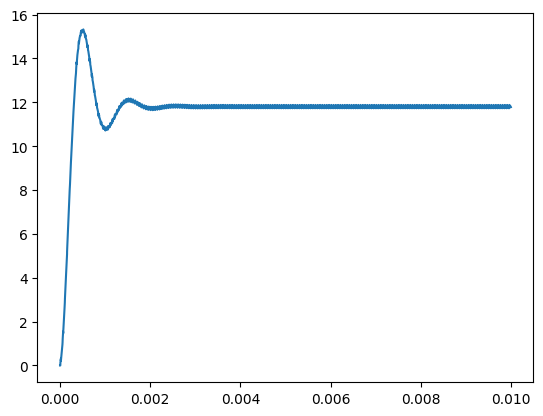

In [52]:
L = 540e-6
C = 43.38e-6
fsw = 20e3

plecs.set(model+'/L1','L', str(L))
plecs.set(model+'/C', 'C', str(C))
plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))
times = plecs.simulate(model) ['Time']
current = plecs.simulate(model) ['Values'][0]
voltage = plecs.simulate(model) ['Values'][1]

plt.plot(times,voltage)

# Try add output (losses into CSV)

In [16]:
V_in = 48
V_out = 12
R_on = 5.6
t_rise = 110e-9
t_fall = 78e-9

L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 10          # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Initialize arrays to store results
average_currents = []
delta_currents = []
delta_currents_percentage = []

# Open a CSV file for writing
csv_file_path = 'simulation_results.csv'

# Define the header for the CSV file
csv_header = ['No','L', 'C', 'delta_current', 'delta_voltage', 'Pl_s1', 'Pl_s2' 'Pl_C', 'Pl_L_Cu']

# Initialize a list to store the data for each simulation
csv_data = []

# Print the chosen values
print("Chosen L values:", L_values)
print("Chosen C values:", C_values)
print("Chosen fsw values:", fsw_values)

# Generate all combinations of L, C, and fsw
combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display the chosen values and simulate
print("\nChosen values and simulation results:")

Chosen L values: [3.00000000e-05 2.48888889e-04 4.67777778e-04 6.86666667e-04
 9.05555556e-04 1.12444444e-03 1.34333333e-03 1.56222222e-03
 1.78111111e-03 2.00000000e-03]
Chosen C values: [3.00000000e-05 4.88888889e-05 6.77777778e-05 8.66666667e-05
 1.05555556e-04 1.24444444e-04 1.43333333e-04 1.62222222e-04
 1.81111111e-04 2.00000000e-04]
Chosen fsw values: [ 20000.  40000.  60000.  80000. 100000. 120000. 140000. 160000. 180000.
 200000.]

Chosen values and simulation results:


In [18]:
import itertools
import numpy as np

# Constants
V_in = 48
V_out = 12
R_on = 5.6
t_rise = 110e-9
t_fall = 78e-9

L = [30e-6, 2000e-6]  
C = [20e-6, 1000e-6]
fsw_range = (20e3, 200e3)  # Range for fsw
num_values = 20  # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# # Create arrays of discrete L, C, and fsw values within the specified ranges
# L_values_all = np.arange(L[0], L[1] + 1e-6, 1e-6)
# L_values_round = np.around(L_values_all, decimals=6) 
# L_values = np.random.choice(L_values_round, num_values, replace=False)

# C_values_all = np.arange(C[0], C[1] + 1e-6, 1e-6)
# C_values_round = np.around(C_values_all, decimals=6) 
# C_values = np.random.choice(C_values_round, num_values, replace=False)

# Create arrays of discrete L and C values within the specified ranges with increments of 1e-6
L_values = np.linspace(L[0], L[1], num=num_values)
C_values = np.linspace(C[0], C[1], num=num_values)

# Round the values to the desired number of decimal places
L_values_round = np.around(L_values, decimals=6)
C_values_round = np.around(C_values, decimals=6)

# # Initialize an empty list to store unique values
# unique_L_values = []
# unique_C_values = []

# # Generate unique values for L
# while len(unique_L_values) < num_values:
#     value = np.random.choice(L_values_round)
#     if value not in unique_L_values:
#         unique_L_values.append(value)

# # Generate unique values for C
# while len(unique_C_values) < num_values:
#     value = np.random.choice(C_values_round)
#     if value not in unique_C_values:
#         unique_C_values.append(value)


fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values).astype(int)

# Initialize arrays to store results
average_currents = []
delta_currents = []
delta_currents_percentage = []

# Initialize a list to store the data for each simulation
csv_data = []
csv_file_path = 'simulation_results_8000.csv'

# Define the header for the CSV file
csv_header = ['No', 'L', 'C', 'fsw', 'delta_current', 'delta_voltage', 'Pl_s1', 'Pl_s2', 'Pl_C', 'Pl_L_Cu']

# Generate all combinations of L, C, and fsw
combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display the chosen values and simulate
# Print the chosen values
print("Chosen L values:", L_values)
print("Chosen C values:", C_values)
print("Chosen fsw values:", fsw_values)

print("\nChosen values and simulation results:")
for i, (L, C, fsw) in enumerate(combinations):
    print("Combination {}: L={}, C={}, fsw={}".format(i + 1, L, C, fsw))
    # Perform simulation and collect results
    # Append results to csv_data list

# Write results to CSV file
# with open(csv_file_path, 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(csv_header)
#     writer.writerows(csv_data)


Chosen L values: [3.00000000e-05 1.33684211e-04 2.37368421e-04 3.41052632e-04
 4.44736842e-04 5.48421053e-04 6.52105263e-04 7.55789474e-04
 8.59473684e-04 9.63157895e-04 1.06684211e-03 1.17052632e-03
 1.27421053e-03 1.37789474e-03 1.48157895e-03 1.58526316e-03
 1.68894737e-03 1.79263158e-03 1.89631579e-03 2.00000000e-03]
Chosen C values: [2.00000000e-05 7.15789474e-05 1.23157895e-04 1.74736842e-04
 2.26315789e-04 2.77894737e-04 3.29473684e-04 3.81052632e-04
 4.32631579e-04 4.84210526e-04 5.35789474e-04 5.87368421e-04
 6.38947368e-04 6.90526316e-04 7.42105263e-04 7.93684211e-04
 8.45263158e-04 8.96842105e-04 9.48421053e-04 1.00000000e-03]
Chosen fsw values: [ 20000  29473  38947  48421  57894  67368  76842  86315  95789 105263
 114736 124210 133684 143157 152631 162105 171578 181052 190526 200000]

Chosen values and simulation results:
Combination 1: L=3e-05, C=2e-05, fsw=20000
Combination 2: L=3e-05, C=2e-05, fsw=29473
Combination 3: L=3e-05, C=2e-05, fsw=38947
Combination 4: L=3e-05, 

### CSV

In [18]:
def write_to_csv(file_path, header, data):
    with open(file_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(header)
        csv_writer.writerows(data)
    data = []

### Average Current and &Delta;I<sub>L</sub>%

In [17]:
def calculate_current(times, current, start_time, end_time):
    # Convert 'times' to a NumPy array
    times = np.array(times)

    # Find the indices corresponding to the time range
    start_index = np.argmax(times >= start_time)
    end_index = np.argmax(times >= end_time)

    # Extract the current values in the specified time range
    current_range = current[start_index:end_index]

    # Calculate the average current value
    average_current = np.mean(current_range)

    # Calculate the difference between the highest and lowest current values
    delta_current = np.max(current_range) - np.min(current_range) 

    # print('Current:')
    # print("\nmax:", np.max(current_range))
    # print("\nmin:", np.min(current_range))
    # print("\ndelta:",delta_current)
    # print("\naverage:",average_current)

    # print(np.max(current_range))
    # print(np.min(current_range))
    delta_current_percentage = delta_current/average_current * 100

    return average_current, delta_current, delta_current_percentage

### &Delta;V<sub>O</sub>%


In [18]:
def calculate_voltage(times, voltage, start_time, end_time):
    # Convert 'times' to a NumPy array
    times = np.array(times)

    # Find the indices corresponding to the time range
    start_index = np.argmax(times >= start_time)
    end_index = np.argmax(times >= end_time)

    # Extract the voltage values in the specified time range
    voltage_range = voltage[start_index:end_index]

    # Calculate the average voltage value
    average_voltage = np.mean(voltage_range)

    # Calculate the difference between the highest and lowest voltage values
    delta_voltage = np.max(voltage_range) - np.min(voltage_range)

    # print('Voltage:')
    # print("\nmax:", np.max(voltage_range))
    # print("\nmin:", np.min(voltage_range))
    # print("\ndelta:",delta_voltage)
    # print("\naverage:",average_voltage)

    delta_voltage_percentage = delta_voltage/average_voltage * 100

    return average_voltage, delta_voltage, delta_voltage_percentage


### Switching Losses
- Conduction Loss
    - R<sub>DS(on)</sub> = R<sub>ON-H</sub> = R<sub>ON-L</sub> = 5.6k&Omega; 
    - High Side
        - P<sub>ON-H</sub> = I<sub>OUT</sub> / 2 &times; R<sub>ON-H</sub> &times; V<sub>OUT</sub> / V<sub>IN</sub> [W]
    - Low Side
        - P<sub>ON-L</sub> = I<sub>OUT</sub> / 2 &times; R<sub>ON-L</sub> &times; (1 - V<sub>OUT</sub> / V<sub>IN</sub>) [W]
- Switching Losses
    - t<sub>rise</sub> = 110 ns  
    - t<sub>fall</sub> = 78 ns
    - High Side
        - P<sub>SW-H</sub> = 1/2 &times; V<sub>IN</sub> &times; I<sub>OUT</sub> &times; (t<sub>rise-H</sub> + t<sub>fall-H</sub>) &times; f<sub>SW</sub>
    - Low Side
        - P<sub>SW-L</sub> = 1/2 &times; V<sub>D</sub> &times; I<sub>OUT</sub> &times; (t<sub>rise-L</sub> + t<sub>fall-L</sub>) &times; f<sub>SW</sub>



<strong>Switching Losses<strong> = P<sub>ON-H</sub> + P<sub>ON-L</sub> + P<sub>SW-H</sub> + P<sub>SW-L</sub>


In [9]:
def calculate_switching_losses(average_current, V_out, V_in, R_on, t_rise, t_fall, f_sw):
    # Calculate power losses during ON state (High and Low)
    P_ON_H = average_current / 2 * R_on * V_out / V_in
    P_ON_L = average_current / 2 * R_on * V_out / V_in

    # Calculate power losses during switching (High and Low)
    P_SW_H = 0.5 * V_in * average_current * (t_rise + t_fall) * f_sw
    P_SW_L = 0.5 * V_in * average_current * (t_rise + t_fall) * f_sw

    # High Side
    Pl_s1 = P_ON_H + P_SW_H

    #Low Side
    Pl_s2 = P_ON_L + P_SW_L

    return Pl_s1, Pl_s2


### Capacitor Loss
- P<sub>CAP(ESR)</sub> = I<sub>CAP(RMS)</sub><sup>2</sup>  &#x00D7; ESR [W]
- ESR = tan(&#x03B4;) / 2&pi;f<sub>SW</sub>C)
    - Dengan 25 V Nippon KZE series: tan &#x03B4; = 0.14
- ESL = 1 / (4π² SRF² C)
    - Assume SRF = 100kHz
- Input Capacitor
    - I<sub>CIN(RMS)</sub> = I<sub>OUT</sub> &times; &radic;(V<sub>IN</sub> - V<sub>OUT</sub>) &times; V<sub>OUT</sub> / V<sub>IN</sub> [A]
- Output Capacitor
    - I<sub>COUT(RMS)</sub> = &Delta;I<sub>L</sub> / (2&radic;3) [A]
    - &Delta;I<sub>L</sub> = (V<sub>IN</sub> - V<sub>OUT</sub>) / (f<sub>SW</sub> &times; L) &times; V<sub>OUT</sub> / V<sub>IN</sub> [A]

<strong>Capacitor Losses<strong> = P<sub>cap_in</sub> + P<sub>cap_out</sub>

In [8]:
def calculate_capacitor_losses(average_current, V_in, V_out, f_sw, L, ESR):
    I_cin = average_current * np.sqrt(V_in - V_out) * V_out / V_in
    I_L = ((V_in - V_out) / (f_sw * L)) * (V_out / V_in)

    I_cout = I_L / (2 * np.sqrt(3))
    P_cap_in = I_cin**2 * ESR
    P_cap_out = I_cout**2 * ESR

    Pl_C = P_cap_in + P_cap_out

    return Pl_C


### Inductor Loss
- Inductor Copper Loss
    - P<sub>Copper, L</sub> = I<sub>RMS</sub><sup>2</sup> &middot; R<sub>L</sub>
<br>
    - I<sub>RMS</sub> = &radic;(I<sub>AVG</sub><sup>2</sup> + <sup>1</sup>&frasl;<sub>12</sub> &Delta;I<sub>L</sub><sup>2</sup>)

In [7]:
def calculate_inductor_copper_loss(average_current, delta_current, R_L):
    I_rms = np.sqrt(average_current**2 + 1/12 * delta_current**2)
    Pl_L_Cu = I_rms**2 * R_L

    return Pl_L_Cu

### Loop

In [24]:
# Loop through the combinations and simulate
csv_data = []
for simulation_num, (L, C, fsw) in enumerate(combinations, start=1):
    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    # Set Plecs parameters and simulate
    plecs.set(model+'/L1', 'L', str(L))
    plecs.set(model+'/C', 'C', str(C))
    plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))
    plecs.set(model+'/RL', 'R', str(R_L))
    plecs.set(model+'/ESR', 'R', str(ESR))
    plecs.set(model+'/ESL', 'L', str(ESL))

    times = plecs.simulate(model)['Time']
    current = plecs.simulate(model)['Values'][0]
    voltage = plecs.simulate(model)['Values'][1]

    # Calculate average and delta current using the function
    average_current, delta_current, delta_current_percentage = calculate_current(times, current, start_time=0.004, end_time=0.005)
    average_voltage, delta_voltage, delta_voltage_percentage = calculate_voltage(times, voltage, start_time=0.004, end_time=0.005)
    Pl_s1, Pl_s2 = calculate_switching_losses(average_current, V_out, V_in, R_on, t_rise, t_fall, fsw)
    Pl_C = calculate_capacitor_losses(average_current, V_in, V_out, fsw, L, ESR)
    Pl_L_Cu = calculate_inductor_copper_loss(average_current, delta_current, R_L)

    # Append the data for this simulation to the list
    csv_data.append([simulation_num,L, C, fsw, delta_current_percentage, delta_voltage_percentage, Pl_s1, Pl_s2, Pl_C, Pl_L_Cu])

    print(f'\nSimulation {simulation_num} for L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, RL={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')
    print(f"\nSimulation {simulation_num} results:")
    print(f"Average Current between 0.004 and 0.005 seconds: {average_current} A")
    print(f"Difference between highest and lowest current values between 0.004 and 0.005 seconds: {delta_current} A")
    print(f"Difference between highest and lowest current values between 0.004 and 0.005 seconds: {delta_current_percentage} %")
    print(f"Difference between highest and lowest voltage values between 0.004 and 0.005 seconds: {delta_voltage} A")
    print(f"Difference between highest and lowest voltage values between 0.004 and 0.005 seconds: {delta_voltage_percentage} %")
    print(f"High Side Switching Losses: {Pl_s1} W")
    print(f"Low Side Switching Losses: {Pl_s2} W")
    print(f"Capacitor Losses: {Pl_C} W")
    print(f"Inductor Copper Losses: {Pl_L_Cu} W")

Current:

max: 9.962085899925917

min: -4.982265328516976

delta: 14.944351228442894

average: 3.2556026550071735
Voltage:

max: 12.675008038889622

min: 10.055806220980628

delta: 2.619201817908994

average: 11.548067497351191

Simulation 1 for L=0.000030, C=0.000030, fsw=20000.00, RL=0.079576, ESR=0.037136, ESL=1.463000e-06

Simulation 1 results:
Average Current between 0.004 and 0.005 seconds: 3.2556026550071735 A
Difference between highest and lowest current values between 0.004 and 0.005 seconds: 14.944351228442894 A
Difference between highest and lowest current values between 0.004 and 0.005 seconds: 459.0348642657058 %
Difference between highest and lowest voltage values between 0.004 and 0.005 seconds: 2.619201817908994 A
Difference between highest and lowest voltage values between 0.004 and 0.005 seconds: 22.680866894047572 %
High Side Switching Losses: 2.5727074420928684 W
Low Side Switching Losses: 2.5727074420928684 W
Capacitor Losses: 1.5819122871435367 W
Inductor Copper L

In [25]:
# Use the function to write data to the CSV file
write_to_csv(csv_file_path, csv_header, csv_data)

In [26]:
print("\nOverall Results:")
print("Average Currents:", average_currents)
print("Delta Currents:", delta_currents)


Overall Results:
Average Currents: []
Delta Currents: []


In [21]:
V_in = 48
V_out = 12
R_on = 5.6
t_rise = 110e-9
t_fall = 78e-9

L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 2           # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14


# Loop through the combinations and simulate
value = [1.32513e+05, 6.21000e-04, 5.10000e-05]

L = value[1]
C = value[2]
fsw = value[0]
# Rules for picking R_L based on L
R_L = next((rl for border, rl in border_values if L <= border), 0.0)

# Calculate ESR and ESL based on the updated C
ESR = tan_delta / (2 * np.pi * fsw * C)
ESL = K_esl / C

# Set Plecs parameters and simulate
plecs.set(model+'/L1', 'L', str(L))
plecs.set(model+'/C', 'C', str(C))
plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))
plecs.set(model+'/RL', 'R', str(R_L))
plecs.set(model+'/ESR', 'R', str(ESR))
plecs.set(model+'/ESL', 'L', str(ESL))

times = plecs.simulate(model)['Time']
current = plecs.simulate(model)['Values'][0]
voltage = plecs.simulate(model)['Values'][1]

# Calculate average and delta current using the function
average_current, delta_current, delta_current_percentage = calculate_current(times, current, start_time=0.004, end_time=0.005)
average_voltage, delta_voltage, delta_voltage_percentage = calculate_voltage(times, voltage, start_time=0.004, end_time=0.005)
Pl_s1, Pl_s2 = calculate_switching_losses(average_current, V_out, V_in, R_on, t_rise, t_fall, fsw)
Pl_C = calculate_capacitor_losses(average_current, V_in, V_out, fsw, L, ESR)
Pl_L_Cu = calculate_inductor_copper_loss(average_current, delta_current, R_L)
total_loss = Pl_s1 + Pl_s2 + Pl_C + Pl_L_Cu

# Append the data for this simulation to the list
# csv_data.append([simulation_num,L, C, fsw, delta_current_percentage, delta_voltage_percentage, Pl_s1, Pl_s2, Pl_C, Pl_L_Cu])

print(f'\nSimulation  for L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, RL={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')
print(f"\nSimulation  results:")
print(f"Average Current between 0.004 and 0.005 seconds: {average_current} A")
print(f"Total loss: {total_loss} P")
print(f"Difference between highest and lowest current values between 0.004 and 0.005 seconds: {delta_current} A")
print(f"Difference between highest and lowest current values between 0.004 and 0.005 seconds: {delta_current_percentage} %")
print(f"Difference between highest and lowest voltage values between 0.004 and 0.005 seconds: {delta_voltage} V")
print(f"Difference between highest and lowest voltage values between 0.004 and 0.005 seconds: {delta_voltage_percentage} %")
print(f"High Side Switching Losses: {Pl_s1} W")
print(f"Low Side Switching Losses: {Pl_s2} W")
print(f"Capacitor Losses: {Pl_C} W")
print(f"Inductor Copper Losses: {Pl_L_Cu} W")


Simulation  for L=0.000621, C=0.000051, fsw=132513.00, RL=0.253239, ESR=0.003297, ESL=8.605882e-07

Simulation  results:
Average Current between 0.004 and 0.005 seconds: 2.2862183056484002 A
Total loss: 7.297219995915367 P
Difference between highest and lowest current values between 0.004 and 0.005 seconds: 0.11004108587121975 A
Difference between highest and lowest current values between 0.004 and 0.005 seconds: 4.813236146318525 %
Difference between highest and lowest voltage values between 0.004 and 0.005 seconds: 0.06793554892508347 V
Difference between highest and lowest voltage values between 0.004 and 0.005 seconds: 0.5944836662959756 %
High Side Switching Losses: 2.9672796662236554 W
Low Side Switching Losses: 2.9672796662236554 W
Capacitor Losses: 0.038777001864017724 W
Inductor Copper Losses: 1.3238836616040388 W
